# O Perceptron
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
- É um modelo **linear** para **classificação binária**
    - Só é possível fazer a separação se os dados forem **linearmente separáveis**
- O seu **aprendizado** é feito através do cálculo dos **pesos** e **vieses**


- Seu funcionamento é baseado no funcionamento do neurônio humano:
<img src="https://drive.google.com/uc?id=1CM4TqqEYyl81gVYYeIaSgA9Fb6lkd0vE" style='width: 1000px;' />



- Foi proposto em 1943 por McCulloch e Pitts e implementado pela primeira vez em 1958 por Frank Rosenblatt e segundo o The New York Times:
    -  **o perceptron é "o embrião de um computador eletrônico que [a Marinha] espera que seja capaz de andar, falar, ver, escrever, reproduzir-se e ter consciência de sua existência"**
- Devido a sua limitação de prever padrões simples como o OU exclusivo (XOR), ficou um tempo "congelado" mas foi retomado fortemente com o avanço do **Deep Learning**

In [8]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


- Podemos considerar o dataset iris
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [9]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [10]:
# Determinando o X e y
X_iris,y_iris = load_iris(return_X_y=True, as_frame=True)

In [11]:
# Visualizando
X_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [12]:
# Selecionando apenas as colunas de pétala e o target 0 e 1
X = X_iris.loc[y_iris.isin([0,1]),['petal length (cm)','petal width (cm)']]
y = y_iris.loc[y_iris.isin([0,1])]

In [13]:
# Verificando o valor de y
y.value_counts()

target
0    50
1    50
Name: count, dtype: int64

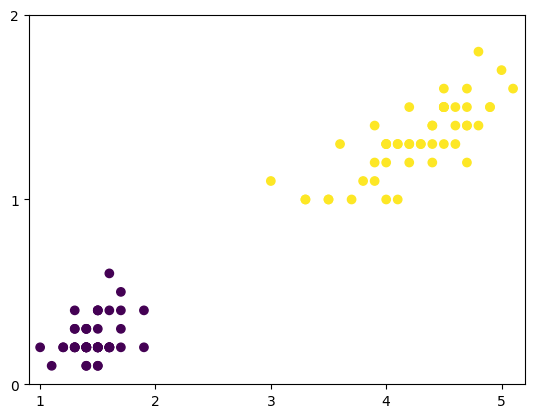

In [14]:
# Observando graficamente os dados
fig, ax = plt.subplots()

ax.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

ax.set(xlim=(0.9,5.2),xticks=[1,2,3,4,5],
   ylim=(0,2),yticks=[0,1,2])

plt.show()

- Para esse caso, teremos como mostrado na figura abaixo:
<img src="https://drive.google.com/uc?id=1HRJtv_viNN_jePnVIWhhjNJWiO8b_3G8" style='width: 500px;' />

- **Podemos utilizar o perceptron para separar esses dados**

In [15]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# Importando o perceptron
from sklearn.linear_model import Perceptron

In [ ]:
# Criando o classificador
clf = Perceptron(tol=1e-3, random_state=0,eta0=0.1)

In [24]:
# Fazendo o fit com os dados
clf = clf.fit(X_train,y_train)

In [25]:
# Fazendo a previsão
y_pred = clf.predict(X_test)

- Podemos utilizar a matriz de confusão para avaliar esse modelo
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [20]:
# Importando a matriz de confusão
from sklearn.metrics import confusion_matrix

In [26]:
# Avaliando o modelo
confusion_matrix(y_test,y_pred)

array([[19,  0],
       [ 0, 14]])

- **Entendendo o que o perceptron fez**
<img src="https://drive.google.com/uc?id=1mhJWu-2Kedtvq_k8iXqlpQp4bfOhAcCP" style='width: 500px;' />

In [29]:
# Verificando o coef_
X_train.head(3)

y_train[:3]

clf.coef_

array([[0.8, 0.8]])

In [30]:
# E o intercept 
clf.intercept_

array([-2.])

In [35]:
# Podemos escrever w1, w2 e w0 como
w1 = round(clf.coef_[0][0],2)
w2 = round(clf.coef_[0][0],2)
w0 = clf.intercept_[0]
print(w1,w2,w0)

0.8 0.8 -2.0


- O resultado será como mostrado na figura:
<img src="https://drive.google.com/uc?id=1RLBa9NVEYVsnV6naed6CrznIrc1JfmoT" style='width: 700px;' />

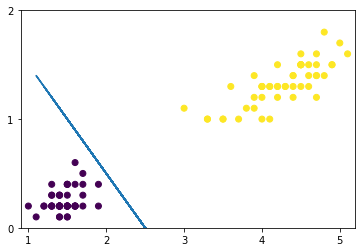

In [ ]:
# Adicionando essa reta no gráfico
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train)
ax.plot(X_train.iloc[:,0],(-w1*X_train.iloc[:,0]-w0)/w2)
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_test)

ax.set(xlim=(0.9,5.2),xticks=[1,2,3,4,5],
   ylim=(0,2),yticks=[0,1,2])

plt.show()

- **O que acontece se tentarmos separar as classes 1 e 2?**

In [ ]:
# Agora considerando as classes 1 e 2
X = X_iris.loc[y_iris.isin([1,2]),['petal length (cm)','petal width (cm)']]
y = y_iris.loc[y_iris.isin([1,2])]

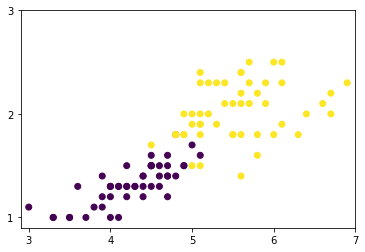

In [ ]:
# Observando graficamente os dados
fig, ax = plt.subplots()

ax.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

ax.set(xlim=(2.9,7),xticks=[3,4,5,6,7],
    ylim=(0.9,3),yticks=[1,2,3])

plt.show()

In [ ]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Criando um novo classificador

In [ ]:
# Fazendo o fit com os dados

In [ ]:
# Fazendo a previsão

In [ ]:
# Avaliando o modelo

array([[19,  0],
       [ 2, 12]], dtype=int64)

In [ ]:
# Podemos escrever w1, w2 e w0 como

-3.800000000000002 -0.24 3.07


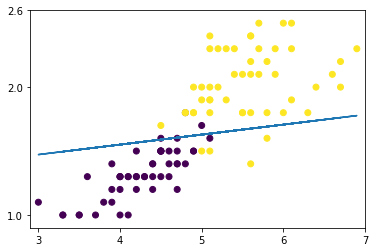

In [ ]:
# Adicionando essa reta no gráfico
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train)
ax.plot(X_train.iloc[:,0],(-w1*X_train.iloc[:,0]-w0)/w2)
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c=y_test)

ax.set(xlim=(2.9,7),xticks=[3,4,5,6,7],
    ylim=(0.9,2.6),yticks=[1,2,2.6])

plt.show()

- O perceptron só consegue separar dados **linearmente separáveis**

<a id='XOR'></a>
## Analisando o problema do OR e do XOR
<img src="https://drive.google.com/uc?id=1GRm1nB8ahSH0eYK7gDU9zYYQlafExaB4" style='width: 350px;' />

In [ ]:
# Vamos considerar inicialmente os dados abaixo
dados = pd.DataFrame({
             'x1': [0,0,1,1]
            ,'x2': [0,1,0,1]
            ,'y': [0,1,1,0]
                    })

In [ ]:
# Visualizando a base
dados

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


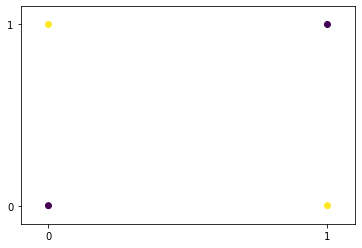

In [ ]:
# E observando graficamente
fig, ax = plt.subplots()

ax.scatter(dados.x1,dados.x2,c=dados.y)

ax.set(xlim=[-0.1,1.1],xticks=[0,1],
       ylim=[-0.1,1.1],yticks=[0,1])

plt.show()

In [ ]:
# Criando o classificador

In [ ]:
# Selecionando X e y

In [ ]:
# Fazendo o fit com os dados

In [ ]:
# Fazendo a previsão

array([0, 0, 0, 0], dtype=int64)

In [ ]:
# Avaliando o modelo

array([[2, 0],
       [2, 0]], dtype=int64)

In [ ]:
# Verificando o coef_

array([[0., 0.]])

In [ ]:
# Verificando o intercept_

array([0.])

In [ ]:
# Podemos escrever w1, w2 e w0 como

0.0 0.0 0.0


C:\Users\Jean Luca\AppData\Local\Temp\ipykernel_8984\3847935731.py:8: RuntimeWarning: invalid value encountered in true_divide
  y_perc = (-w1*x_perc-w0)/w2


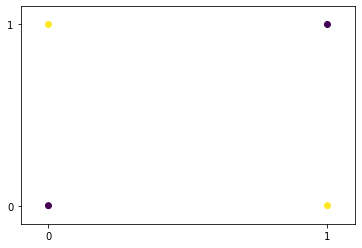

In [ ]:
# Visualizando esse resultado graficamente
fig, ax = plt.subplots()

# Criando um array de x
x_perc = np.linspace(-0.1,1,100)

# Agora calculando o y
y_perc = (-w1*x_perc-w0)/w2

ax.scatter(dados.x1,dados.x2,c=dados.y)
ax.plot(x_perc,y_perc,'r')

ax.set(xlim=[-0.1,1.1],xticks=[0,1],
       ylim=[-0.1,1.1],yticks=[0,1])

plt.show()

- Agora [voltando](#XOR) e fazendo para o OU Exclusivo

- Apesar de conseguir separar bem casos lineares, o perceptron não foi eficiente em um caso "simples" como o **OU Exclusivo**, colocando em cheque a sua funcionalidade durante um bom tempo
    - Até que o **ganho do poder computacional e o aumento na quantidade de dados** permitiram conectar **vários perceptrons em várias camadas**